In [399]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr

red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [2]:
df = pd.read_hdf('../output/good.h5')
x = df['bp_rp']
dx = np.sqrt((1/df['phot_bp_mean_flux_error'])**2 + 
             (1/df['phot_rp_mean_flux_error'])**2)
y = df['logperiod_mean']
dy = df['logperiod_sd']

<ErrorbarContainer object of 3 artists>

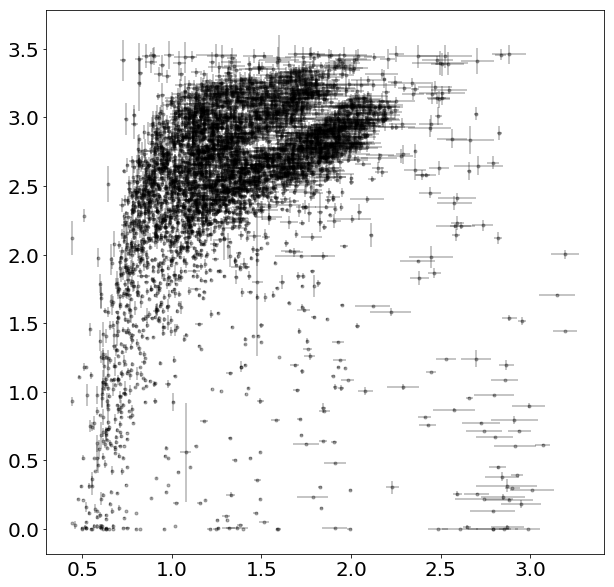

In [306]:
pl.figure(figsize=(10, 10))
gaptrend = np.log(5.8*(2**x))
pl.errorbar(x, y, yerr=dy, xerr=dx, fmt='k.', alpha=0.3)
#pl.xlim(0.5, 2.5)
#pl.ylim(1.0, 3.5)

In [176]:
import KDEpy as kde
grid_points = 200
data = np.vstack((x, y-gaptrend)).T
w2 = np.array((dx**2+dy**2))
w2[w2 > 0.05] = 0
kde = kde.TreeKDE(bw=w2)
grid, points = kde.fit(data).evaluate(grid_points)

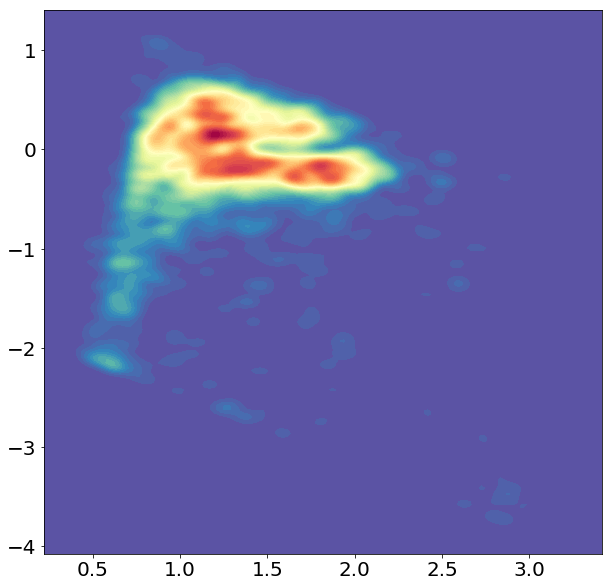

In [177]:
gridx, gridy = np.unique(grid[:, 0]), np.unique(grid[:, 1])
z1 = points.reshape(grid_points, grid_points).T

pl.figure(figsize=(10, 10))
# Plot the kernel density estimate
#pl.contour(gridx, gridy, z, 5, linewidths=0.8, colors='k')
pl.contourf(gridx, gridy, z1, 50, cmap='Spectral_r')
#pl.plot(data[:, 0], data[:, 1], '.k', alpha=0.1)
#pl.xlim(0.5, 2.5)
#pl.ylim(1.0, 3.5)

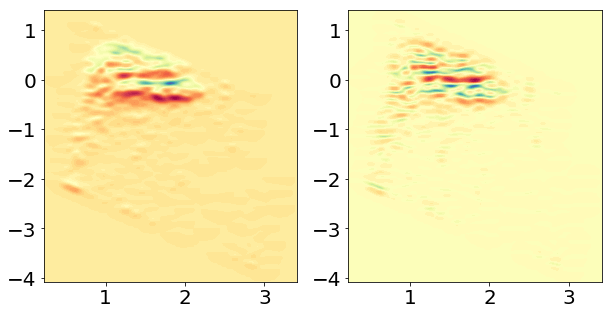

In [182]:
fig, ax = pl.subplots(1, 2, figsize=(10, 5))
#pl.figure(figsize=(10, 10))
gradz = np.gradient(z1)[0]
#gradz = np.sqrt(gradz[0]**2 + gradz[1]**2)
ggradz = np.gradient(gradz)[0]
#ggradz = np.sqrt(ggradz[0]**2, ggradz[1]**2)
#ax[0].contour(gridx, gridy, z1, 10, colors='k', alpha=0.5)
#ax[1].contour(gridx, gridy, z1, 10, colors='k', alpha=0.5)
ax[0].contourf(gridx, gridy, gradz, 50, cmap='Spectral_r')
ax[1].contourf(gridx, gridy, ggradz, 50, cmap='Spectral_r')
#[x.set_xlim(0.5, 2.5) for x in ax]
#[x.set_ylim(1.0, 3.5) for x in ax]

In [353]:
npeaks = 2
dy = np.mean(np.diff(gridy))
lower_edge = np.zeros((grid_points, npeaks))
midgap = np.zeros((grid_points, npeaks))
upper_edge = np.zeros((grid_points, npeaks))
lower_widths = np.zeros((grid_points, npeaks))
mid_widths = np.zeros((grid_points, npeaks))
upper_widths = np.zeros((grid_points, npeaks))
for i in range(grid_points):
    gz, ggz = gradz[:, i], ggradz[:, i]
    
    peaks = signal.find_peaks(ggz, height=0.01)[0]
    widths = signal.peak_widths(ggz, peaks)
    perm = np.argsort(ggz[peaks])[::-1]
    midgap[i, :len(peaks)] = gridy[peaks[perm][:npeaks]]
    mid_widths[i, :len(peaks)] = widths[0][perm][:npeaks]*dy
    
    peaks = signal.find_peaks(-gz)[0]
    widths = signal.peak_widths(-gz, peaks)
    perm = np.argsort(-gz[peaks])[::-1]
    lower_edge[i, :len(peaks)] = gridy[peaks[perm][:npeaks]]
    lower_widths[i, :len(peaks)] = widths[0][perm][:npeaks]*dy
    
    peaks = signal.find_peaks(gz)[0]
    widths = signal.peak_widths(gz, peaks)
    perm = np.argsort(gz[peaks])[::-1]
    upper_edge[i, :len(peaks)] = gridy[peaks[perm][:npeaks]]
    upper_widths[i, :len(peaks)] = widths[0][perm][:npeaks]*dy

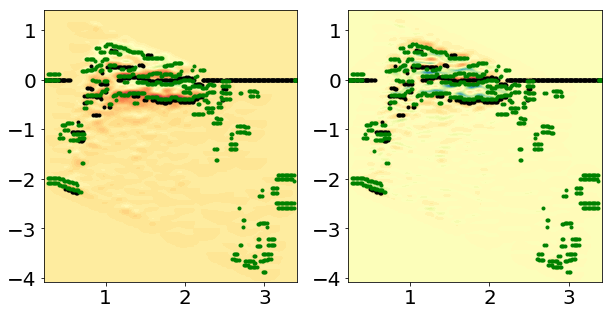

In [354]:
fig, ax = pl.subplots(1, 2, figsize=(10, 5))
ax[0].contourf(gridx, gridy, gradz, 50, cmap='Spectral_r')
ax[1].contourf(gridx, gridy, ggradz, 50, cmap='Spectral_r')
ax[0].plot(gridx, midgap, 'k.')
ax[1].plot(gridx, midgap, 'k.')
ax[0].plot(gridx, lower_edge, 'g.')
ax[1].plot(gridx, lower_edge, 'g.')
ax[0].plot(gridx, upper_edge, 'g.')
ax[1].plot(gridx, upper_edge, 'g.')

In [363]:
xbounds = (gridx > 1.4) & (gridx < 2)
ybounds = (-0.2, 0.2)
selected_midgap = midgap[:,0][xbounds & (midgap[:,0] < ybounds[1]) & (midgap[:,0] > ybounds[0])]
selected_mid_widths = mid_widths[:,0][xbounds & (midgap[:,0] < ybounds[1]) & (midgap[:,0] > ybounds[0])]
gridx_midgap = gridx[xbounds & (midgap[:,0] < ybounds[1]) & (midgap[:,0] > ybounds[0])]

selected_lower = lower_edge[:,0][xbounds & (lower_edge[:,0] < ybounds[1]) & (lower_edge[:,0] > ybounds[0])]
selected_lower_widths = lower_widths[:,0][xbounds & (lower_edge[:,0] < ybounds[1]) & (lower_edge[:,0] > ybounds[0])]
gridx_lower = gridx[xbounds & (lower_edge[:,0] < ybounds[1]) & (lower_edge[:,0] > ybounds[0])]

selected_upper = upper_edge[:,1][xbounds & (upper_edge[:,1] < ybounds[1]) & (upper_edge[:,1] > ybounds[0])]
selected_upper_widths = upper_widths[:,1][xbounds & (upper_edge[:,0] < ybounds[1]) & (upper_edge[:,1] > ybounds[0])]
gridx_upper = gridx[xbounds & (upper_edge[:,1] < ybounds[1]) & (upper_edge[:,1] > ybounds[0])]

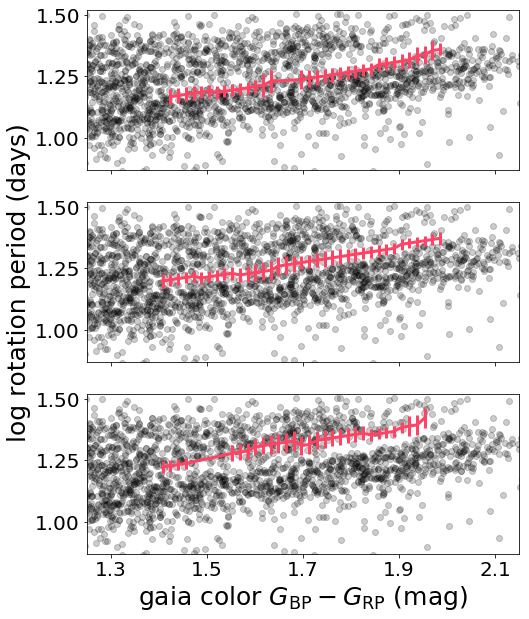

In [488]:
fig, ax = pl.subplots(3, 1, figsize=(8, 10), sharex=True)
pl.xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
ax[1].set_ylabel("log rotation period (days)")
#pl.errorbar(x, y, yerr=dy, xerr=dx, fmt='k.', alpha=0.3, zorder=-1)
l = np.log10(np.e)
[ax.plot(x, y*l, 'ko', alpha=0.2, zorder=-1) for ax in ax]
gaptrend_midgap = np.log(5.8*(2**gridx_midgap))
gaptrend_lower = np.log(5.8*(2**gridx_lower))
gaptrend_upper = np.log(5.8*(2**gridx_upper))
ax[1].errorbar(gridx_midgap, (selected_midgap+gaptrend_midgap)*l, yerr=l*selected_mid_widths/2.355, color=red, linewidth=3)
ax[0].errorbar(gridx_lower, (selected_lower+gaptrend_lower)*l, yerr=l*selected_lower_widths/2.355, color=red, linewidth=3)
ax[2].errorbar(gridx_upper, (selected_upper+gaptrend_upper)*l, yerr=l*selected_upper_widths/2.355, color=red, linewidth=3)
[ax.yaxis.set_major_formatter(pl.ScalarFormatter()) for ax in ax]
#[ax.set_yticks([1, 5, 10, 15, 20, 25, 30]) for ax in ax]
[ax.set_xticks(np.linspace(0.5, 2.5, 11)) for ax in ax]
[ax.set_xlim(1.25, 2.15) for ax in ax]
[ax.set_ylim(2*l, 3.5*l) for ax in ax]
fig.subplots_adjust(left=0.15)
pl.savefig("/Users/tgordon/Desktop/edges.pdf")

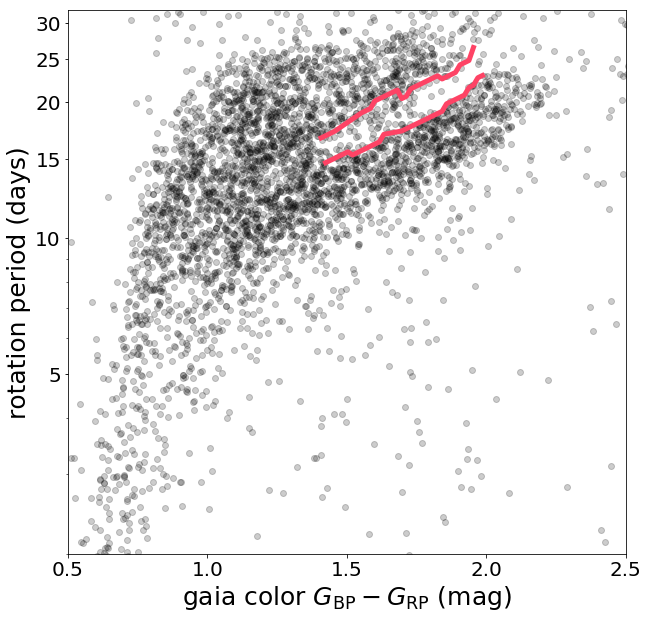

In [437]:
pl.figure(figsize=(10, 10))
pl.semilogy(x, np.exp(y), 'ko', alpha=0.2, zorder=-1)
gaptrend_midgap = np.log(5.8*(2**gridx_midgap))
gaptrend_lower = np.log(5.8*(2**gridx_lower))
gaptrend_upper = np.log(5.8*(2**gridx_upper))
#pl.plot(gridx_midgap, selected_midgap+gaptrend_midgap, color=red, linewidth=5)
pl.semilogy(gridx_lower, np.exp(selected_lower+gaptrend_lower), color=red, linewidth=5)
pl.semilogy(gridx_upper, np.exp(selected_upper+gaptrend_upper), color=red, linewidth=5)
pl.xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
pl.ylabel("rotation period (days)")
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
pl.gca().set_yticks([1, 5, 10, 15, 20, 25, 30])
pl.gca().set_xticks(np.linspace(0.5, 2.5, 5))
pl.xlim(0.5, 2.5)
pl.ylim(2.0, 32)
pl.savefig("/Users/tgordon/Desktop/period_edges.pdf")

In [ ]:
import KDEpy as kde
grid_points = 2**7
data = np.vstack((x, y)).T
kde = kde.FFTKDE(bw=0.025)
grid, points = kde.fit(data).evaluate(grid_points)

gridx, gridy = np.unique(grid[:, 0]), np.unique(grid[:, 1])
z2 = points.reshape(grid_points, grid_points).T

pl.figure(figsize=(10, 7))
# Plot the kernel density estimate
#pl.contour(gridx, gridy, z, 5, linewidths=0.8, colors='k')
pl.contourf(gridx, gridy, z2, 50, cmap='Spectral_r')
#pl.plot(data[:, 0], data[:, 1], '.k', alpha=0.1)

In [ ]:
pl.contourf(gridx, gridy, z1-z2, 50, cmap='Spectral_r')

In [ ]:
import statsmodels.api as sm

dens_u = sm.nonparametric.KDEMultivariate(data=[x, y], 
                                          var_type='cc', bw=[np.mean(dx), np.mean(dy)])

In [ ]:
gridx, gridy = np.meshgrid(np.linspace(x.min(), x.max(), grid_points), np.linspace(y.min(), y.max(), grid_points))
z = dens_u.pdf([gridx.flatten(), gridy.flatten()])
z = z.reshape(grid_points, grid_points)

In [ ]:
pl.contourf(gridx, gridy, z, 50, cmap='Spectral_r')

In [ ]:
dens_u.bw

In [ ]:
[np.array(dx), np.array(dy)]